In [1]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#データセット(iris)の読み込み
from sklearn.datasets import load_iris
iris=load_iris()
#データの確認
columns=iris.feature_names    
X=iris.data
y=iris.target #←50×3個のデータがある
#dfの作成
df_X=pd.DataFrame(X,columns=columns)
df_y=pd.DataFrame(y,columns=["class"])
df=pd.concat([df_X,df_y],axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


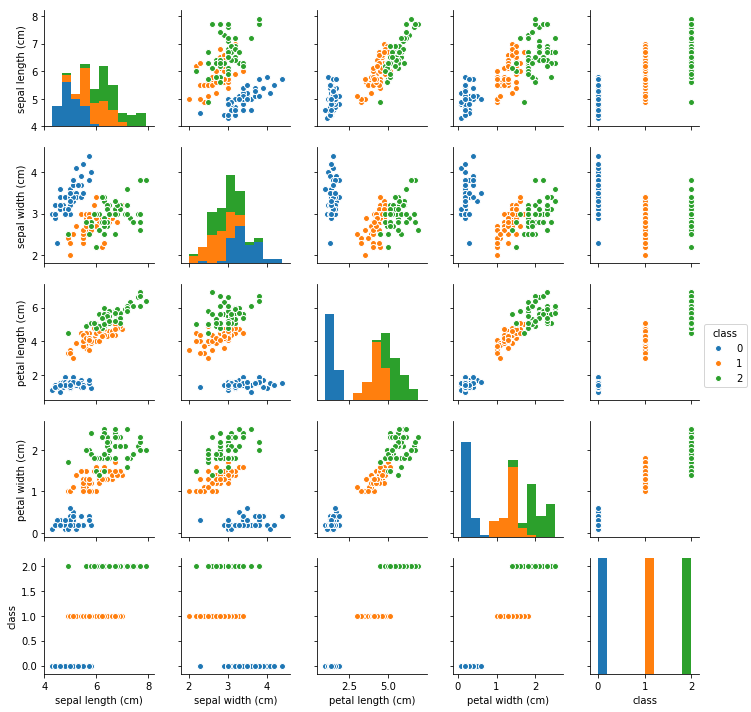

In [2]:
#基本統計量を出力
df.describe()
#散布図行列を出力
import seaborn as sns
sns.pairplot(df,hue="class",size=2.0) #←classごとに色分けしてくれる
plt.show()

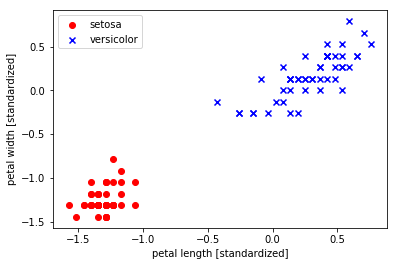

In [3]:
#標準化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)   
#説明変数の選択(可視化するために2つの特徴量を選択)
X_std1=X_std[:100,[2,3]]
y1=y[:100]
#プロットして線形分離可能かどうかを確認
plt.scatter(X_std[:50, 2], X_std[:50,3],
            color="red", marker="o", label="setosa") # settosa
plt.scatter(X_std[50:100, 2], X_std[50:100, 3],
            color="blue", marker="x",label="versicolor") # versicolor
plt.xlabel("petal length [standardized]") 
plt.ylabel("petal width [standardized]")  
plt.legend(loc="upper left") 
plt.show()

In [4]:
#データの分割
from sklearn.model_selection import train_test_split
X_std1_train,X_std1_test,y1_train,y1_test=train_test_split(X_std1,
                            y1,test_size=0.3,random_state=0)

In [5]:
#データの学習
from sklearn.linear_model import Perceptron
ppn1=Perceptron(eta0=0.1)  #学習率η=0.1
ppn1.fit(X_std1_train,y1_train)

/Users/KANI112094/.pyenv/versions/anaconda3-5.0.1/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

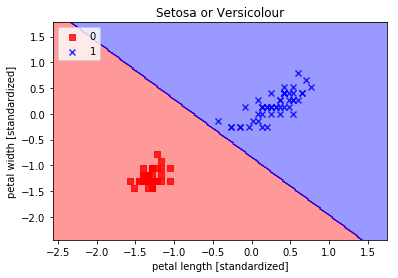

正答率
train:1.000
test:1.000
answer:1
preict:1


In [6]:
#2次元データの決定曲線と領域を出力する関数を定義
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

#散布図上に決定曲線と領域をプロット
plot_decision_regions(X_std1, y1, ppn1)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.title('Setosa or Versicolour')
plt.show()

#正答率を表示
print("正答率")
print("train:%.3f"%ppn1.score(X_std1_train,y1_train))
print("test:%.3f"%ppn1.score(X_std1_test,y1_test))

#indexが28の予測クラス・正解クラスを出力
print("answer:%d"%y1_test[28])
print("preict:%d"%ppn1.predict(X_std1_test[28].reshape(1,-1)))

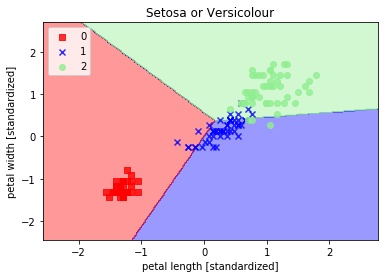

正答率
train:0.895
test:0.889
answer:1
predict:0


In [7]:
#データの選択
X_std2=X_std[:,[2,3]]
y2=y

#データの分割
X_std2_train,X_std2_test,y2_train,y2_test=train_test_split(X_std2,
                                y2,test_size=0.3,random_state=0)
#データの学習
ppn2=Perceptron(eta0=0.1)
ppn2.fit(X_std2_train,y2_train)

#散布図上に決定曲線と領域を出力
plot_decision_regions(X_std2, y2, ppn2)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.title('Setosa or Versicolour')
plt.show()

#正答率を表示
print("正答率")
print("train:%.3f"%ppn2.score(X_std2_train,y2_train))
print("test:%.3f"%ppn2.score(X_std2_test,y2_test))

#indexが35の正解ラベル・予測ラベルの出力
print("answer:%d"%y2_test[35])
print("predict:%d"%ppn2.predict(X_std2_test[[35]]))